# Summary of experiments

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, time, pickle

sys.path.insert(1, '../../src/')
from aux import *

plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams["figure.figsize"]=15,7.5
plt.rcParams.update({'font.size': 40})
fig_path='fig/'
fig_path='../../../discrete-ergodic-flows-tex/fig/'

In [34]:
########################
########################
#     load results    #
########################
########################

# mad mix
madmix_elbos=pkl_load('results/madmix_elbos_toydiscrete')
madmix_elbos=np.hstack((madmix_elbos,pkl_load('results/madmix_elbos_ising')))
madmix_elbos=madmix_elbos[-madmix_elbos<np.inf]

madmix_cput=pkl_load('results/madmix_cput_toydiscrete')
madmix_cput=np.hstack((madmix_cput,pkl_load('results/madmix_cput_ising')))


# gibbs
gibbs_elbos=pkl_load('results/gibbs_elbos_toydiscrete')
gibbs_elbos=np.hstack((gibbs_elbos,pkl_load('results/gibbs_elbos_ising')))
gibbs_elbos=gibbs_elbos[-gibbs_elbos<np.inf]

gibbs_cput=pkl_load('results/gibbs_cput_toydiscrete')
gibbs_cput=np.hstack((gibbs_cput,pkl_load('results/gibbs_cput_ising')))


# concrete
concrete_elbos=pkl_load('results/concrete_elbos_toydiscrete')
concrete_elbos=np.vstack((concrete_elbos,pkl_load('results/concrete_elbos_ising'))).flatten()
concrete_elbos=concrete_elbos[-concrete_elbos<np.inf]

concrete_cput=pkl_load('results/concrete_cput_toydiscrete')
concrete_cput=np.vstack((concrete_cput,pkl_load('results/concrete_cput_ising'))).flatten()
concrete_cput=concrete_cput[concrete_cput>0]

([<matplotlib.axis.XTick at 0x13398bc10>,
 [Text(0, 0, 'Mad Mix'), Text(1, 0, 'Gibbs'), Text(2, 0, 'Concrete')])

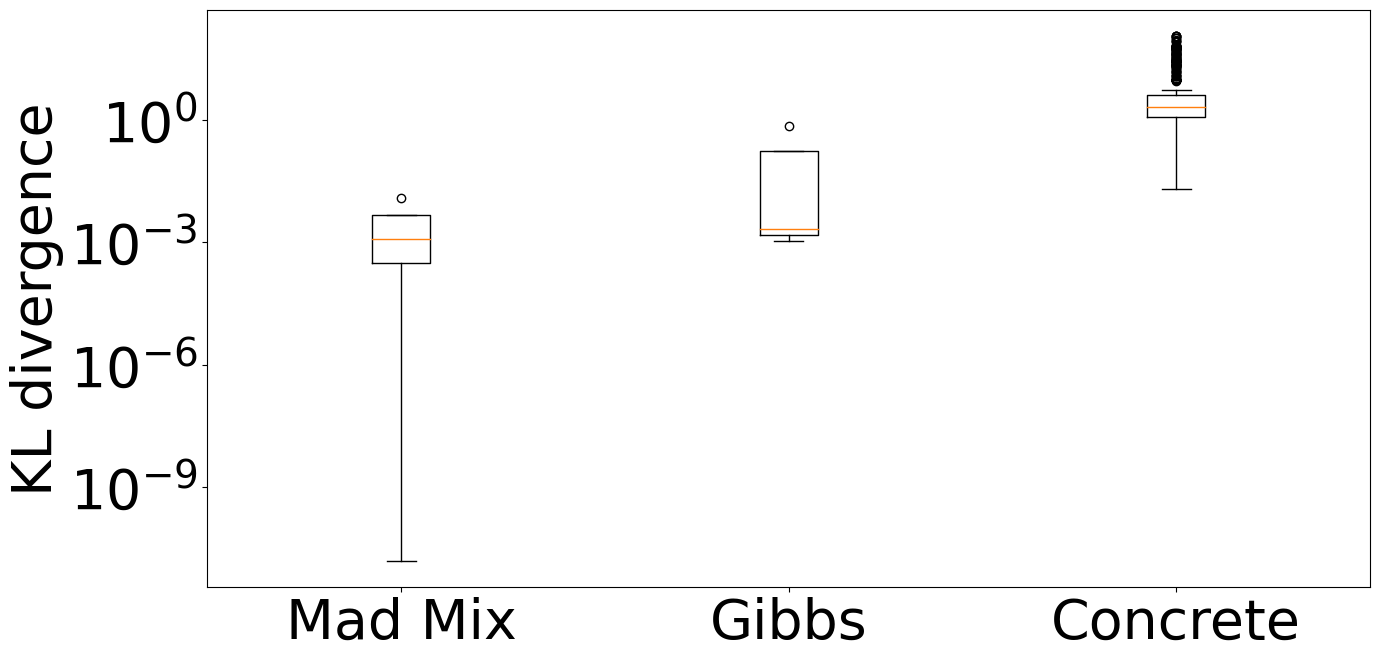

In [35]:
plt.boxplot(-madmix_elbos,positions=[0])
plt.boxplot(-gibbs_elbos,positions=[1])
plt.boxplot(-concrete_elbos,positions=[2])

plt.ylabel('KL divergence')
plt.yscale('log')
plt.xticks(ticks=[0,1,2],labels=['Mad Mix', 'Gibbs', 'Concrete'])

([<matplotlib.axis.XTick at 0x14b33eac0>,
 [Text(0, 0, 'Mad Mix'), Text(1, 0, 'Gibbs'), Text(2, 0, 'Concrete')])

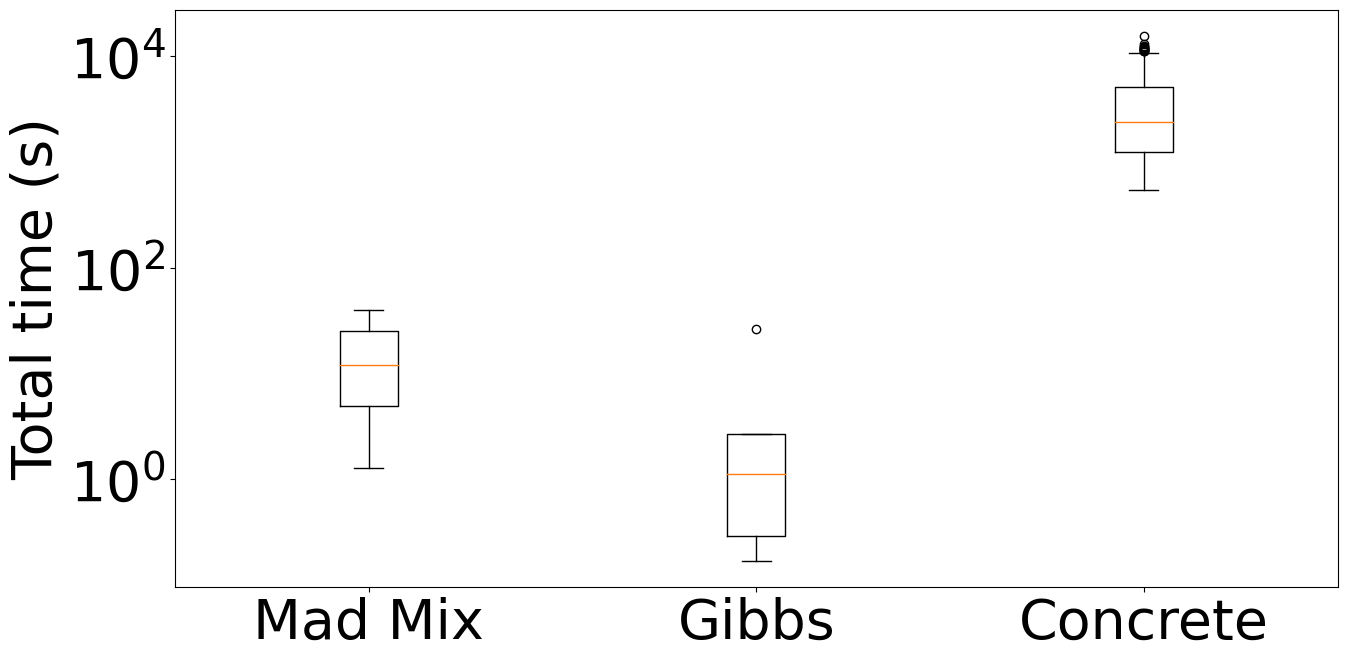

In [37]:
plt.boxplot(madmix_cput,positions=[0])
plt.boxplot(gibbs_cput,positions=[1])
plt.boxplot(concrete_cput,positions=[2])

plt.ylabel('Total time (s)')
plt.yscale('log')
plt.xticks(ticks=[0,1,2],labels=['Mad Mix', 'Gibbs', 'Concrete'])